In [24]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pixell

import sys
sys.path.append('../../ThumbStack')

from cmb import StageIVCMB

import flat_map
from flat_map import *

import catalog
from catalog import *

import universe
from universe import *

import mass_conversion
from mass_conversion import *

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmasher as cm
plt.style.use('default.mplstyle')
%matplotlib inline

def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

In [19]:
# map dimensions in degrees
sizeX = 10.
sizeY = 10.

# number of pixels for the flat map, let's do 0.5' pixels
# pix_scale = 2 # in arcmin
pix_scale = 0.5 # in arcmin
nX = int(sizeX*60./pix_scale)
nY = int(sizeY*60./pix_scale)

# basic map object
baseMap = FlatMap(nX=nX, nY=nY, sizeX=sizeX*np.pi/180., sizeY=sizeY*np.pi/180.)

# multipoles to include in the lensing reconstruction
# reminder: l=100 ~ 1 degree
lMin = 30.; lMax = 6000.

# ell bins for power spectra
nBins = 21  # number of bins
lRange = (1., 2.*lMax)  # range for power spectra

# order: [[ra_min, dec_max], [ra_max, dec_min]]
box = np.array([[10., 210.], [20., 200.]]) * utils.degree
#box = np.array([[-5., 0.], [0., 5.]]) * utils.degree
resArcmin = 0.5 #1. #0.5  # 0.1   # map pixel size [arcmin]
shape,wcs = enmap.geometry(pos=box, res=resArcmin * utils.arcmin, proj='car')

# create a mask that keeps the whole area
boxMask = enmap.ones(shape, wcs=wcs)
pixsizemap = boxMask.pixsizemap()

89.23577240438216 22.34002769660062 8098.743248089867 8013.9237781951115 7809.790827383111 7729.167004512778


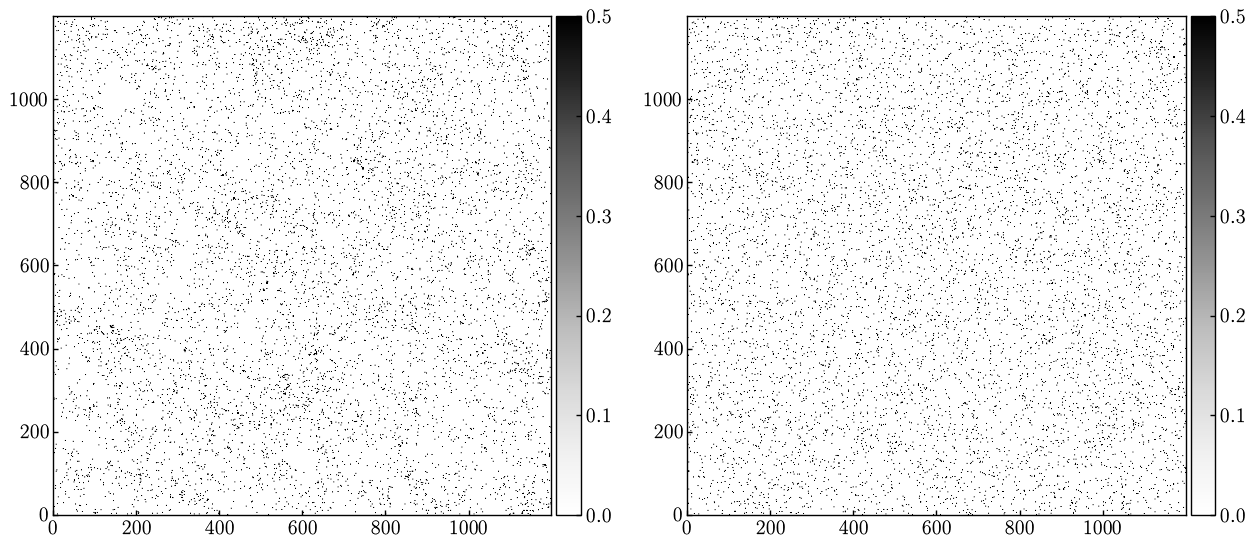

In [20]:
cmass_d = fitsio.read('../output/catalog/cmass_m_10x10_sig5/mock_count_dirac_car.fits')
rand_d = fitsio.read('../output/catalog/cmass_m_10x10_sig5_randradec/mock_count_dirac_car.fits')
fig, axs = plt.subplots(1,2, figsize=(15,7))
im0 = axs[0].imshow(cmass_d, cmap='Greys', origin='lower', vmin=0, vmax=0.5)
im1 = axs[1].imshow(rand_d, cmap='Greys', origin='lower', vmin=0, vmax=0.5)

cbar0 = colorbar(im0)
cbar1 = colorbar(im1)
print(np.max(cmass_d), np.max(rand_d), np.sum(cmass_d/4), np.sum(rand_d/4),
      np.sum(pixsizemap * cmass_d *(180. * 60./np.pi)**2),
      np.sum(pixsizemap * rand_d *(180. * 60./np.pi)**2))

0.41216536916425195 0.25705209227680714 7928.181432770566 7922.673038732933 7644.865914336587 7641.341212321351


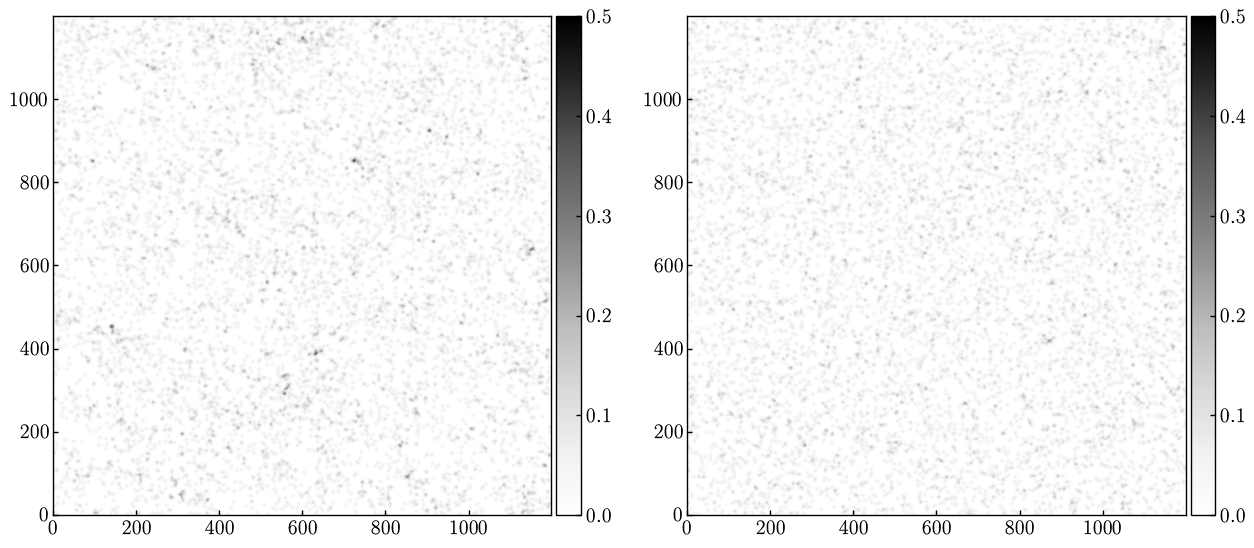

In [21]:
cmass = fitsio.read('../output/catalog/cmass_m_10x10_v2/cmass_m_10x10_v2_mock_count_gauss_car.fits')
rand = fitsio.read('../output/catalog/cmass_m_10x10_randradec_v2/cmass_m_10x10_randradec_v2_mock_count_gauss_car.fits')
fig, axs = plt.subplots(1,2, figsize=(15,7))
im0 = axs[0].imshow(cmass, cmap='Greys', origin='lower', vmin=0, vmax=0.5)
im1 = axs[1].imshow(rand, cmap='Greys', origin='lower', vmin=0, vmax=0.5)

cbar0 = colorbar(im0)
cbar1 = colorbar(im1)
print(np.max(cmass), np.max(rand), np.sum(cmass/4), np.sum(rand/4),
      np.sum(pixsizemap * cmass *(180. * 60./np.pi)**2),
      np.sum(pixsizemap * rand *(180. * 60./np.pi)**2))

Generating map


/home/theo/Documents/research/CMB/patchy_tau_sims/notebooks/../../ThumbStack/flat_map.py:459: RuntimeWarning: invalid value encountered in divide
  sCl /= np.sqrt(Nmodes)


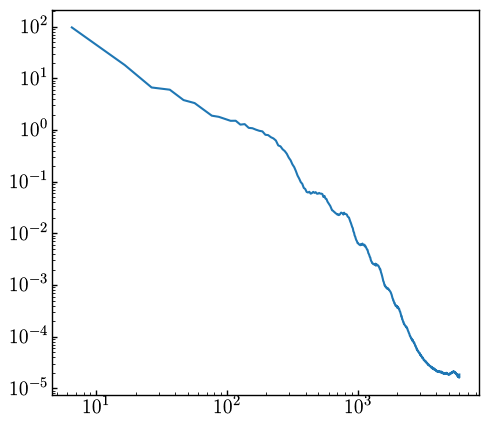

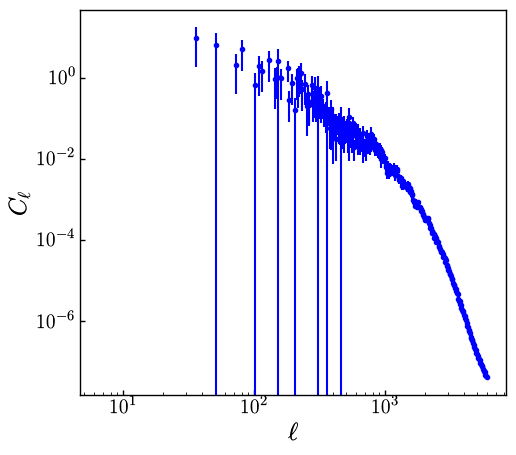

In [22]:
sys.path.append('../scripts/')
from make_noise_maps import make_cmb, gen_lensed_map, gen_map_from_data_powspec, gen_map_from_fn

datadir = '/home/theo/Documents/research/CMB/patchy_tau_sims/data/AdvACT_NILC_cls_fullRes_TT/'
ell = np.load(datadir+'ells.npy')
cl = np.load(datadir+'cl_tt.npy')
cmb = make_cmb()
plt.plot(ell, cl)
plt.loglog()
# actmap = gen_map_from_data_powspec(ell, cl, cmb, baseMap, name='actnilc', seed=100)
actmap = gen_map_from_fn(cmb.flensedTT, cmb, baseMap, name='actnilc', lMin=30, lMax=6000, seed=42)
act_ell, act_cl, act_scl = actmap.powerSpectrum(lRange=ell, nBins=600, plot=True)

[]

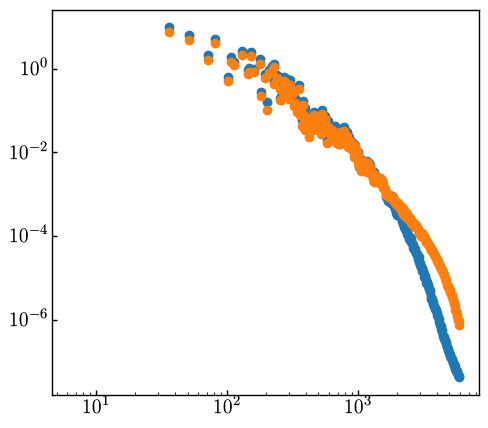

In [23]:
screenmap = actmap.copy()
screenmap.data = screenmap.data * (1-5*cmass)
screenmap.dataFourier = screenmap.fourier(screenmap.data)
act_ell, act_cl, act_scl = actmap.powerSpectrum(lRange=ell, nBins=600, plot=False)
screen_ell, screen_cl, screen_scl = screenmap.powerSpectrum(lRange=ell, nBins=600, plot=False)
plt.scatter(act_ell, act_cl)
plt.scatter(screen_ell, screen_cl)
plt.loglog()

In [16]:
print(act_cl/screen_cl)

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

/tmp/ipykernel_16719/3957182126.py:1: RuntimeWarning: invalid value encountered in divide
  print(act_cl/screen_cl)


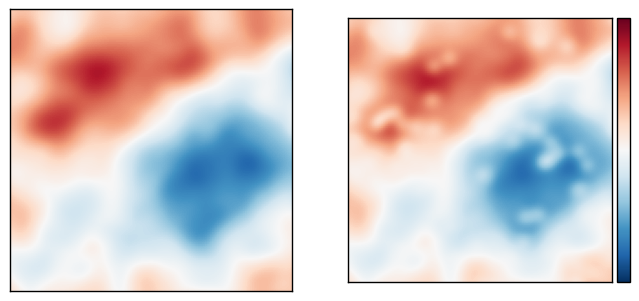

In [8]:
fig, axs = plt.subplots(1,2, figsize=(8,5))
bl_corner = 650
sq_size = 120
map1 = actmap.data[bl_corner:bl_corner+sq_size, bl_corner:bl_corner+sq_size]
map2 = screenmap.data[bl_corner:bl_corner+sq_size, bl_corner:bl_corner+sq_size]
for i, mmap in enumerate([map1, map2]):
    im = axs[i].imshow(mmap, cmap='RdBu_r', origin='lower', vmin=-300, vmax=300)

cbar = colorbar(im)
cbar.set_ticks([])
for ax in axs:
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

In [9]:
def pretty_colorbar(mappable, pos='right', cbar_kw={}, cbax_kw=None):
    #FIXME: get to work on multiple rows
    import matplotlib.pyplot as plt
    import inspect
    last_axes = plt.gca()
    f = last_axes.figure
    left, bottom, width, height = last_axes.get_position().bounds
    pad = 0.02
    if pos == 'right':
        bounds = [left + width*(1 + pad), bottom, width*0.05, height]
    elif pos == 'bottom':
        bounds = [left, bottom - height*(1 + pad), width, height*0.05]
    cax = f.add_axes(bounds)
    cax.grid(False)
    cax.tick_params(axis='y', width=0.5)
    cbar = f.colorbar(mappable, cax=cax, **cbar_kw)
    if cbax_kw is not None:
        cax.set_ylabel(**cbax_kw)
    return cbar

In [10]:
def large(x):
    return 100 * (2 * np.cos(7.*x) + 3 * np.sin(3.*x)) - 225

def gaussian(x, mu=0, sigma=1.):
    return np.sqrt(1/2/np.pi) * np.exp(-(x - mu)**2 / 2 / sigma**2)

def small(x, norm=1.):
    centroids = [0.1, 0.24, 0.3, 0.45, 0.51, 0.6, 0.67, 0.7, 0.82, 0.93]
    tot_fn = np.zeros_like(x)
    for c in centroids:
        tot_fn += norm * gaussian(x, mu=c, sigma=0.005)
    return tot_fn

In [11]:
def pretty_multi_im(im_list, ax_dict):
    # setup fig
    # ENH: make more general for vertical orientation (i.e. flip all subplot2grid values and place cbar on bottom)
    nplt = len(im_list)
    dx = ax_dict['ax_x']
    aspect_ratio = ax_dict['ax_aspect_ratio'] # y/x
    dy = aspect_ratio * dx * 2
    fig_x = dx*nplt + int(1.5*(nplt-1))
    print(fig_x, dy)
    fig = plt.figure(figsize=(fig_x, dy))

    axs = []
    for i, data in enumerate(im_list):
        if i > 0:
            ax = plt.subplot2grid((int(np.round(dy))*2 + 1, fig_x), (0,i*int(fig_x/nplt)), 
                                   rowspan=int(np.round(dy)), colspan=dx, sharey=first_ax)
        else:
            first_ax = plt.subplot2grid((int(np.round(dy))*2 + 1, fig_x), (0,i*int(fig_x/nplt)), 
                                   rowspan=int(np.round(dy)), colspan=dx)
            ax = first_ax
            ax.set(ylabel=ax_dict['ylabel'])
        ax.set(xlabel=ax_dict['xlabel'])
        # ax.set(xlim=(0,100), ylim=(0,100))
        ax.grid(ax_dict['grid'])
        im = ax.imshow(data, cmap=ax_dict['cmap'], origin='lower', vmin=ax_dict['vmin'], vmax=ax_dict['vmax'])
        axs.append(ax)

    pretty_colorbar(im, cbax_kw={'ylabel':ax_dict['cbar_label'], 'labelpad':0.1*mpl.rcParams['legend.fontsize']})

    # set up 2nd row 1d schematic plot
    last_axes = plt.gca()
    left, bottom, width, height = last_axes.get_position().bounds
    last_ax = plt.subplot2grid((int(np.round(dy))*2 + 1, fig_x), (int(dy)+2,0), 
                                   rowspan=int(np.round(dy)), colspan=fig_x-1)
    small_color = '#6a8b67'
    large_color = 'k'
    # s = ax.plot(x, small(x))
    # t = ax.plot(x, large(x) * ( 1 - small(x)), c='#ca8f5e', label=r'$\delta T_{\rm small}$')
    x = np.linspace(0, 1, 1000)
    t = last_ax.plot(x, large(x) * ( 1 - small(x)), c=small_color, label=r'$\delta T_{\rm small}$')
    # lg = ax.plot(x, large(x), c='#574f78', label=r'$\delta T_{\rm large}$')
    lg = last_ax.plot(x, large(x), c=large_color, label=r'$\delta T_{\rm large}$')
    last_ax.grid(False)
    last_ax.axhline(0, ls=':', c='k', alpha=0.5)
    axs.append(last_ax)

    return fig, axs

9 8.0


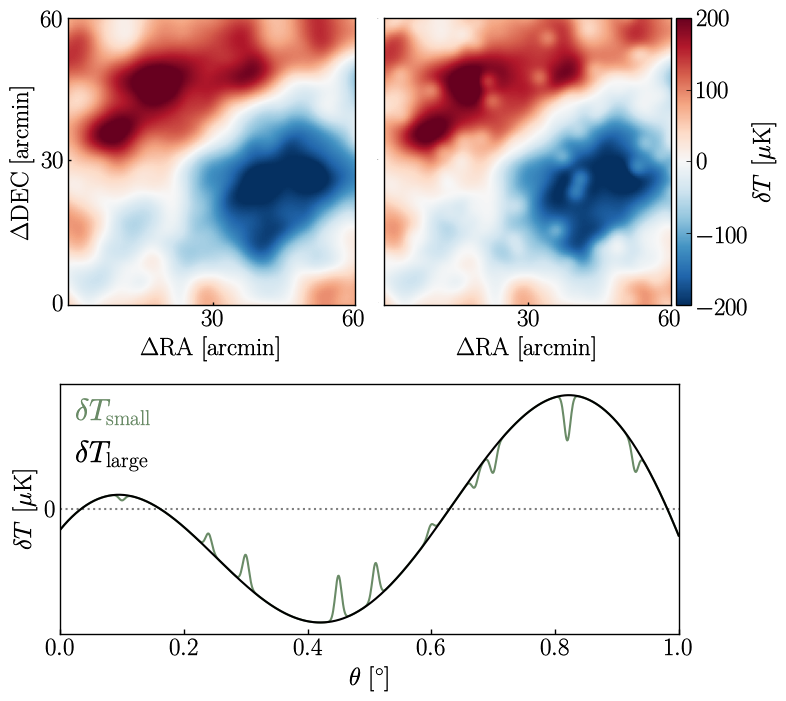

In [104]:
ax_dict={
    'xlabel': r'$\Delta$RA [arcmin]',
    'ylabel': r'$\Delta$DEC [arcmin]',
    'vmin': -200,
    'vmax': 200,
    'cbar_label': r'$\delta T$ [$\mu$K]',
    'ax_x': 4,
    'ax_aspect_ratio': 1.,
    'cmap': 'RdBu_r',
    'grid': False}
f, axs = pretty_multi_im((map1, map2), ax_dict)
for ax in axs[:-1]:
    ax.grid(False)
    ax.set_xticks([119], [60])
    ax.set_xticks([60], [30], minor=True)
    ax.set_yticks([0, 119], [0, 60])
    ax.set_yticks([60], [30], minor=True)
    ax.tick_params(which='major', axis='both', length=0)
    ax.tick_params(which='minor', axis='both', length=2, width=1)
axs[1].tick_params(axis='y', labelsize=0, length=0, which='both')
# axs[0].tick_params(axis='y', labelsize=0, which='both')
# axs[0].set_yticks([0, 119], [0, 60])
# axs[0].set_yticks([60], [30], minor=True)

axs[-1].set_yticks([0], [0])
axs[-1].tick_params(axis='y', length=0)
axs[-1].set(xlabel=r'$\theta~[^\circ]$', ylabel=r'$\delta T$ [$\mu$K]', xlim=[0, 1])
l = axs[-1].legend(frameon=False, framealpha=1., borderaxespad=0.1, handletextpad=0, handlelength=0, fontsize=22)
for lh in l.legend_handles:
    lh.set_visible(False)
for line, text in zip(l.get_lines(), l.get_texts()):
    text.set_color(line.get_color())

fn = '/home/theo/Documents/research/CMB/patchy_tau_sims/paper_figures/final/1d+2d_screening_schematic_v2'
plt.savefig(fn+'.pdf', dpi=72, bbox_inches='tight')
plt.savefig(fn+'.png', dpi=72, bbox_inches='tight')

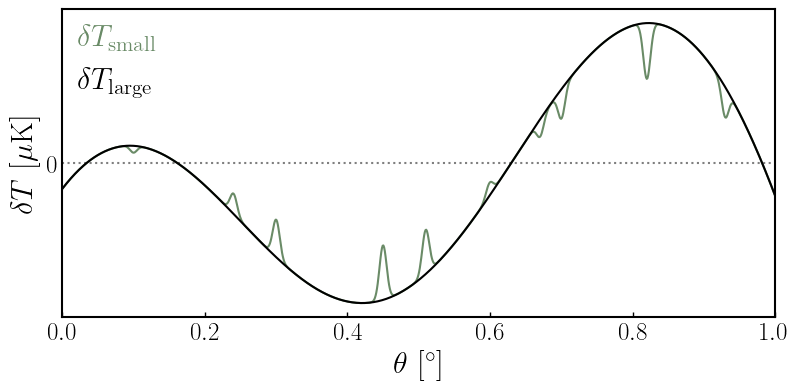

In [329]:
f, ax = plt.subplots(1,1, figsize=(9.2,4))
x = np.linspace(0, 1, 1000)
def large(x):
    return 100 * (2 * np.cos(7.*x) + 3 * np.sin(3.*x)) - 225

def gaussian(x, mu=0, sigma=1.):
    return np.sqrt(1/2/np.pi) * np.exp(-(x - mu)**2 / 2 / sigma**2)

def small(x, norm=1.):
    centroids = [0.1, 0.24, 0.3, 0.45, 0.51, 0.6, 0.67, 0.7, 0.82, 0.93]
    tot_fn = np.zeros_like(x)
    for c in centroids:
        tot_fn += norm * gaussian(x, mu=c, sigma=0.005)
    return tot_fn
small_color = '#6a8b67'
large_color = 'k'
# s = ax.plot(x, small(x))
# t = ax.plot(x, large(x) * ( 1 - small(x)), c='#ca8f5e', label=r'$\delta T_{\rm small}$')
t = ax.plot(x, large(x) * ( 1 - small(x)), c=small_color, label=r'$\delta T_{\rm small}$')
# lg = ax.plot(x, large(x), c='#574f78', label=r'$\delta T_{\rm large}$')
lg = ax.plot(x, large(x), c=large_color, label=r'$\delta T_{\rm large}$')
ax.grid(False)
ax.axhline(0, ls=':', c='k', alpha=0.5)

ax.set_yticks([0])fig.subplots_adjust(top=0.85)
ax.tick_params(axis='y', length=0)
ax.set(xlabel=r'$\theta~[^\circ]$', ylabel=r'$\delta T$ [$\mu$K]', xlim=[0, 1])
l = ax.legend(frameon=False, framealpha=1., borderaxespad=0.1, handletextpad=0, handlelength=0, fontsize=22)
for lh in l.legend_handles:
    lh.set_visible(False)
for line, text in zip(l.get_lines(), l.get_texts()):
    text.set_color(line.get_color())



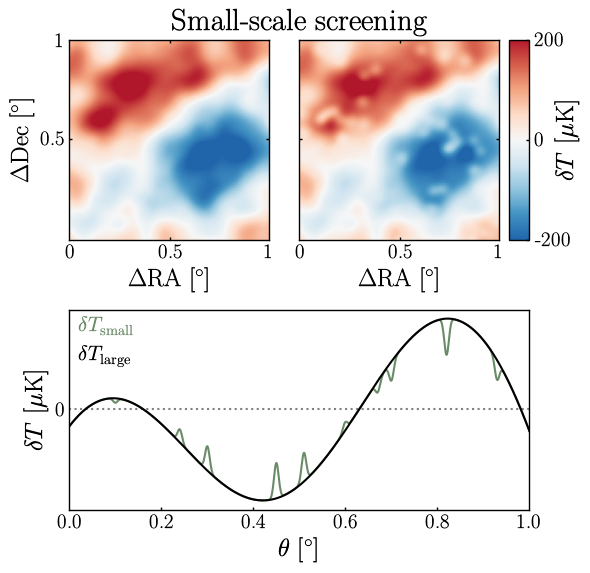

In [27]:
import matplotlib.pyplot as plt
import cmasher as cmr
from mpl_toolkits.axes_grid1 import Divider, Size
# from mpl_toolkits.axes_grid1.axes_size import Fixed, Scaled
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15

fig = plt.figure(figsize=(5.75, 5.6)) #width, height
# fig = plt.figure(figsize=(4, 4))
# The first items are for padding and the second items are for the axes.
# sizes are in inch.
h = [Size.Fixed(0.6), Size.Fixed(2), Size.Fixed(0.3), Size.Fixed(2),
     Size.Fixed(0.10), Size.Fixed(0.2), Size.Fixed(0.45)]
v = [Size.Fixed(0.55), Size.Fixed(2), Size.Fixed(0.7), Size.Fixed(2), Size.Fixed(0.55)]

divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)
# The width and height of the rectangle are ignored.

# set up meshes
sq_size=120
y, x = np.meshgrid(np.arange(sq_size), np.arange(sq_size))

ax = fig.add_axes(
    divider.get_position(),
    axes_locator=divider.new_locator(nx=1, ny=3)
)
ax.imshow(map1, cmap=cmr.get_sub_cmap('RdBu_r', 0.10, 0.90), vmin=-200, vmax=200, origin='lower')
# ax.pcolormesh(x, y, map1.T, cmap=cmr.get_sub_cmap('RdBu_r', 0.10, 0.90), vmin=-200, vmax=200, shading='nearest')
# ax.set_xlabel(r"$\Delta$RA [arcmin]")
# ax.set_ylabel(r"$\Delta$Dec [arcmin]")
# ax.set_xticks([0, 119], [0, 60])
# ax.set_xticks([60], [30], minor=True)
# ax.set_yticks([119], [60])
# ax.set_yticks([60], [30], minor=True)
ax.set_xlabel(r"$\Delta$RA [$^{\circ}$]")
ax.set_ylabel(r"$\Delta$Dec [$^{\circ}$]")
ax.set_xticks([0, 119], [0, 1])
ax.set_xticks([60], [0.5], minor=True)
ax.set_yticks([119], [1])
ax.set_yticks([60], [0.5], minor=True)
ax.tick_params(which='major', axis='both', length=0)
ax.tick_params(which='minor', axis='both', length=2, width=1,  top=True, right=True)
# ax.set_title("Figure Title")

ax = fig.add_axes(
    divider.get_position(),
    axes_locator=divider.new_locator(nx=3, ny=3)
)
im = ax.imshow(map2, cmap=cmr.get_sub_cmap('RdBu_r', 0.10, 0.90), vmin=-200, vmax=200, origin='lower')
# im = ax.pcolormesh(x, y, map2.T, cmap=cmr.get_sub_cmap('RdBu_r', 0.10, 0.90), vmin=-200, vmax=200, shading='nearest')
# ax.set_xlabel(r"$\Delta$RA [arcmin]")
# ax.set_xticks([0, 119], [0, 60])
# ax.set_xticks([60], [30], minor=True)
# ax.set_yticks([119], [60])
# ax.set_yticks([60], [30], minor=True)

ax.set_xlabel(r"$\Delta$RA [$^{\circ}$]")
ax.set_xticks([0, 119], [0, 1])
ax.set_xticks([60], [0.5], minor=True)
ax.set_yticks([119], [1])
ax.set_yticks([60], [0.5], minor=True)
ax.set_yticklabels([], minor=True)
ax.set_yticklabels([])
ax.tick_params(which='major', axis='both', length=0)
ax.tick_params(which='minor', axis='both', length=2, width=1, top=True, right=True)
# ax.set_ylabel("y label [units]")
# ax.tick_params(axis='y', labelsize=0, length=0, which='both')

# ax.set_title("Figure Title")

ax1 = fig.add_axes(
    divider.get_position(),
    axes_locator=divider.new_locator(nx=5, ny=3)
)
plt.colorbar(im, cax=ax1, label=r'$\delta T~[\mu$K]')
# ax1.set_yticks([0], [0])
# ax1.tick_params(length=2)
# ax1.set_title(r'$+200$', fontsize=15)
# ax1.set_xlabel(r'$-200$', fontsize=15)
ax1.set_yticks([-200, 0, 200], [-200, 0, 200])
ax1.tick_params(length=2)
ax1.set_ylabel(ylabel=r'$\delta T~[\mu$K]', labelpad=-10)


ax = fig.add_axes(
    divider.get_position(),
    axes_locator=divider.new_locator(nx=1, nx1=6, ny=1)
)

small_color = '#6a8b67'
large_color = 'k'
x = np.linspace(0,1,1000)
t = ax.plot(x, large(x) * ( 1 - small(x)), c=small_color, label=r'$\delta T_{\rm small}$')
lg = ax.plot(x, large(x), c=large_color, label=r'$\delta T_{\rm large}$')
ax.set(xlim=(0,1), xlabel=r'$\theta~[^{\circ}]$', ylabel=r'$\delta T~[\mu$K]', yticks=[0])
ax.axhline(0, ls=':', alpha=0.5, c='k')
ax.set_xticks([0., 1.], [0., 1.], minor=False)
ax.set_xticks([0.2, 0.4, 0.6, 0.8], [0.2, 0.4, 0.6, 0.8], minor=True)
ax.tick_params(which='major', axis='both', length=0)
ax.tick_params(which='minor', axis='x', length=2, width=1)
ax.set_title('Small-scale screening', fontsize=22, pad=201)


l = ax.legend(frameon=False, framealpha=1., borderaxespad=0., handletextpad=0, handlelength=0)
for lh in l.legend_handles:
    lh.set_visible(False)
for line, text in zip(l.get_lines(), l.get_texts()):
    text.set_color(line.get_color())

# ax.set_title("Figure Title")
# fig.suptitle('Small-scale screening', fontsize=22)
fn = '/home/theo/Documents/research/CMB/patchy_tau_sims/paper_figures/screening/1d+2d_screening_schematic_v7'
plt.savefig(fn+'.pdf', dpi=100)
plt.savefig(fn+'.png', dpi=100)

## Large-scale screening

Generating map


/home/theo/Documents/research/CMB/patchy_tau_sims/notebooks/../../ThumbStack/flat_map.py:459: RuntimeWarning: invalid value encountered in divide
  sCl /= np.sqrt(Nmodes)


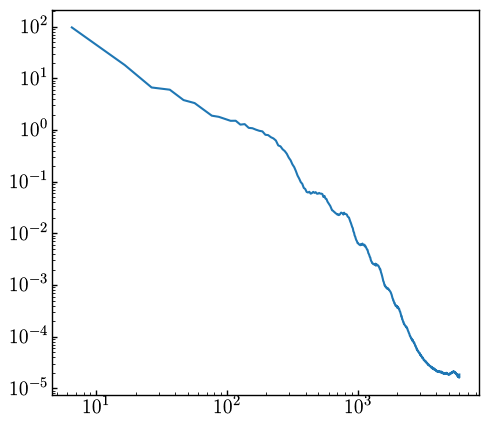

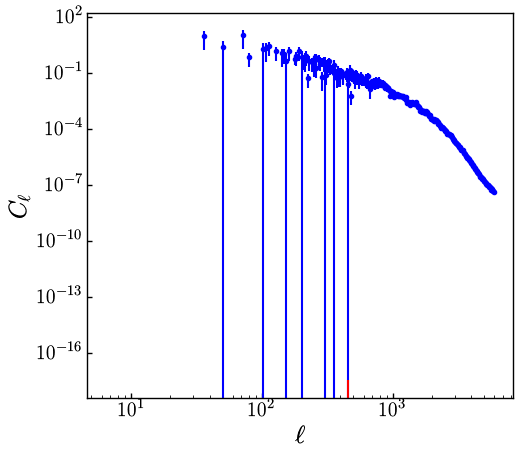

In [53]:
# map dimensions in degrees
sizeX = 10.
sizeY = 10.

# number of pixels for the flat map, let's do 0.5' pixels
pix_scale = 2 # in arcmin
# pix_scale = 0.5 # in arcmin
nX = int(sizeX*60./pix_scale)
nY = int(sizeY*60./pix_scale)

# basic map object
baseMap = FlatMap(nX=nX, nY=nY, sizeX=sizeX*np.pi/180., sizeY=sizeY*np.pi/180.)

# multipoles to include in the lensing reconstruction
# reminder: l=100 ~ 1 degree
lMin = 30.; lMax = 6000.

# ell bins for power spectra
nBins = 21  # number of bins
lRange = (1., 2.*lMax)  # range for power spectra

# order: [[ra_min, dec_max], [ra_max, dec_min]]
box = np.array([[10., 210.], [20., 200.]]) * utils.degree
#box = np.array([[-5., 0.], [0., 5.]]) * utils.degree
resArcmin = 0.5 #1. #0.5  # 0.1   # map pixel size [arcmin]
shape,wcs = enmap.geometry(pos=box, res=resArcmin * utils.arcmin, proj='car')

# create a mask that keeps the whole area
boxMask = enmap.ones(shape, wcs=wcs)
pixsizemap = boxMask.pixsizemap()

sys.path.append('../scripts/')
from make_noise_maps import make_cmb, gen_lensed_map, gen_map_from_data_powspec, gen_map_from_fn

datadir = '/home/theo/Documents/research/CMB/patchy_tau_sims/data/AdvACT_NILC_cls_fullRes_TT/'
ell = np.load(datadir+'ells.npy')
cl = np.load(datadir+'cl_tt.npy')
cmb = make_cmb()
plt.plot(ell, cl)
plt.loglog()
# actmap = gen_map_from_data_powspec(ell, cl, cmb, baseMap, name='actnilc', seed=100)
actmap = gen_map_from_fn(cmb.flensedTT, cmb, baseMap, name='actnilc', lMin=30, lMax=6000, seed=42)
act_ell, act_cl, act_scl = actmap.powerSpectrum(lRange=ell, nBins=600, plot=True)

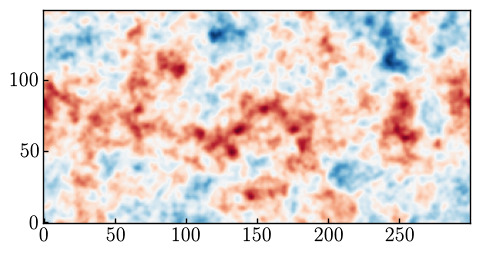

In [54]:
bl_corner = 0
sq_size = 150
# map3 = actmap.data
map3 = actmap.data[bl_corner:bl_corner+sq_size, bl_corner:bl_corner+sq_size*2]
plt.imshow(map3, origin='lower', cmap='RdBu_r')

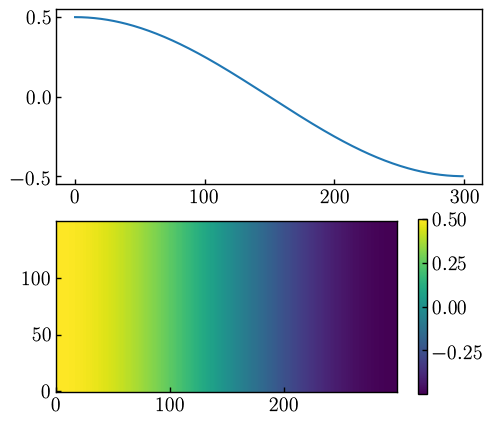

In [55]:
f, ax = plt.subplots(2,1)
y, x = np.meshgrid(np.arange(sq_size), np.arange(sq_size*2))
z = np.cos(x / sq_size / 2 * np.pi) * 0.5
l = ax[0].plot(np.arange(sq_size*2), z[:,0])
cm = ax[1].pcolormesh(x, y, z)
ax[1].set_aspect('equal')
plt.colorbar(cm)

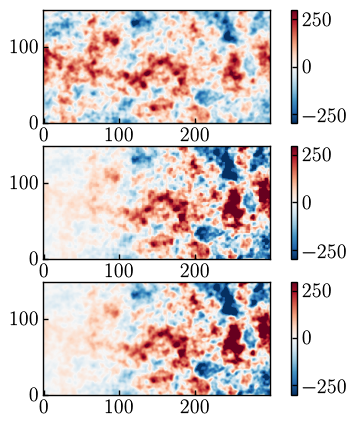

In [56]:
f, ax = plt.subplots(3,1)
y, x = np.meshgrid(np.arange(sq_size), np.arange(sq_size*2))
z = np.cos(x / sq_size / 2 * np.pi) * 0.8
vmin = -300
vmax = -vmin
unsc = ax[0].imshow(map3, origin='lower', vmin=vmin, vmax=vmax, cmap='RdBu_r')
plt.colorbar(unsc)
sc = ax[1].pcolormesh(x, y, map3.T * (1-z), vmin=vmin, vmax=vmax, cmap='RdBu_r')
plt.colorbar(sc)
ax[1].set_aspect('equal')
sc_im = ax[2].imshow(map3 * (1-z.T), origin='lower', vmin=vmin, vmax=vmax, cmap='RdBu_r')
plt.colorbar(sc_im)
ax[2].set_aspect('equal')

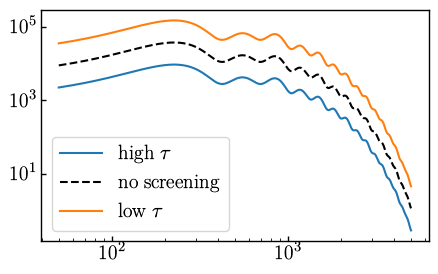

In [49]:
f, ax = plt.subplots(1,1, figsize=(5,3))
cmb = make_cmb()
ell = np.linspace(50, 5000, 1000)
plt.plot(ell, ell**2 * cmb.funlensedTT(ell)*0.25, label=r'high $\tau$')
plt.plot(ell, ell**2 * cmb.funlensedTT(ell)*1, label=r'no screening', ls='--', c='k')
plt.plot(ell, ell**2 * cmb.funlensedTT(ell)*4, label=r'low $\tau$')
plt.loglog()
plt.legend(loc='lower left')
plt.grid(False)

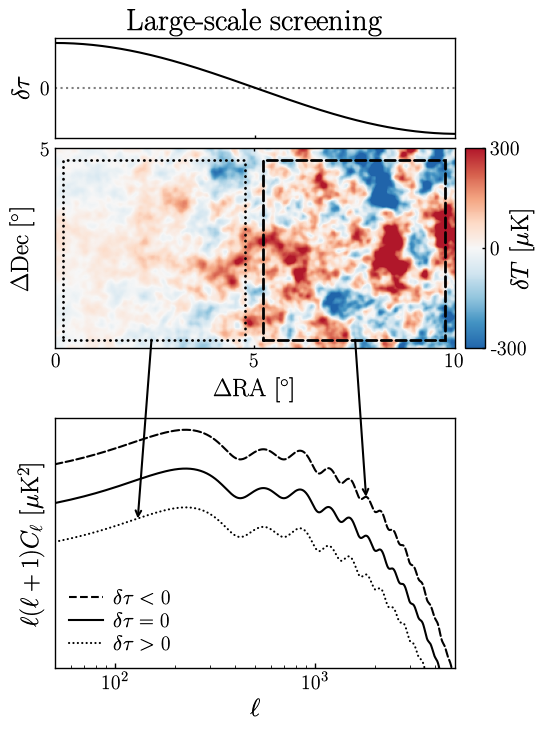

In [58]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1 import Divider, Size
import cmasher as cmr
# from mpl_toolkits.axes_grid1.axes_size import Fixed, Scaled
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15

fig = plt.figure(figsize=(5.4, 7.2)) #width, height
# fig = plt.figure(figsize=(4, 4))
# The first items are for padding and the second items are for the axes.
# sizes are in inch.
h = [Size.Fixed(0.5), Size.Fixed(4.0), Size.Fixed(0.10), Size.Fixed(0.2), Size.Fixed(0.4)]
v = [Size.Fixed(0.55), Size.Fixed(2.5), Size.Fixed(0.7), Size.Fixed(2), Size.Fixed(0.1), Size.Fixed(1), Size.Fixed(0.55)]

divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)
# The width and height of the rectangle are ignored.

### FIRST ROW ####

ax = fig.add_axes(
    divider.get_position(),
    axes_locator=divider.new_locator(nx=1, ny=5)
)
tau = 0.8
y, x = np.meshgrid(np.arange(sq_size), np.arange(sq_size*2))
z = np.cos(x / sq_size / 2 * np.pi) * tau
l = ax.plot(np.arange(sq_size*2) / sq_size * 1.01, z[:,0], c='k')
# ax.set(xlim=(0,2), xlabel=r'$\theta~[^{\circ}]$', ylabel=r'$\delta\tau$', yticks=[0])
ax.set(xlim=(0,2), ylabel=r'$\delta\tau$', yticks=[0])
ax.axhline(0, ls=':', alpha=0.5, c='k')
ax.set_xticks([0., 2.], [], minor=False)
ax.set_xticks([1.0], [], minor=True)
ax.tick_params(which='major', axis='both', length=0)
ax.tick_params(which='minor', axis='x', length=2, width=1)
ax.set_title('Large-scale screening', fontsize=22)

### SECOND ROW ###

ax2 = fig.add_axes(
    divider.get_position(),
    axes_locator=divider.new_locator(nx=1, ny=3)
)
vmin = -300
vmax = -vmin
# sc = ax2.pcolormesh(x, y, map3.T * (1-z), vmin=vmin, vmax=vmax, cmap=cmr.get_sub_cmap('RdBu_r', 0.10, 0.90), shading='gouraud')
sc = ax2.imshow(map3 * (1-z.T), vmin=vmin, vmax=vmax, cmap=cmr.get_sub_cmap('RdBu_r', 0.10, 0.90), origin='lower')
# ax.set_xlabel(r"$\Delta$RA [arcmin]")
# ax.set_ylabel(r"$\Delta$Dec [arcmin]")
# ax.set_xticks([0, 119], [0, 60])
# ax.set_xticks([60], [30], minor=True)
# ax.set_yticks([119], [60])
# ax.set_yticks([60], [30], minor=True)
ax2.set_xlabel(r"$\Delta$RA [$^{\circ}$]")
ax2.set_ylabel(r"$\Delta$Dec [$^{\circ}$]")
ax2.set_xticks([0, 299], [0, 10])
ax2.set_xticks([149], [5], minor=True)
# ax.set_xticks([0.5, 1.0, 1.5], [0.5, 1.0, 1.5], minor=True)
ax2.set_yticks([149], [5])
# ax.set_yticks([299], [2.5], minor=True)
ax2.tick_params(which='major', axis='both', length=0)
ax2.tick_params(which='minor', axis='both', length=2, width=1,  top=True, right=True)
# ax.set_ylim(0, 119)
ax2.set_aspect('equal')

# try rectangles
lt_c = 'k'
ht_c = 'k'
lt_ls = '--'
ht_ls = (0.01, (0.1, 2.01))
pad = 3
h, w = sq_size-5*pad, sq_size-4.5*pad
ht_rect = Rectangle((2*pad, 2*pad), w, h, edgecolor=ht_c, fill=False, lw=2, ls=ht_ls, capstyle='round')
lt_rect = Rectangle((sq_size+2*pad, 2*pad), w, h, edgecolor=lt_c, fill=False, lw=2, ls=lt_ls, capstyle='round')
ax2.add_patch(lt_rect)
ax2.add_patch(ht_rect)

ax1 = fig.add_axes(
    divider.get_position(),
    axes_locator=divider.new_locator(nx=3, ny=3)
)
plt.colorbar(sc, cax=ax1)
# ax1.set_yticks([ 0], [0])
ax1.set_yticks([-300, 0, 300], [-300, 0, 300])
ax1.tick_params(length=2)
ax1.set_ylabel(ylabel=r'$\delta T~[\mu$K]', labelpad=-10)
# ax1.set_title(r'$+300$', fontsize=15)
# ax1.set_xlabel(r'$-300$', fontsize=15)
# ax1.yaxis.set_ticks_position('left')
# ax1.yaxis.set_label_position('left')

### THIRD ROW ### 
ax4 = fig.add_axes(
    divider.get_position(),
    axes_locator=divider.new_locator(nx=1, ny=1)
)
cmb = make_cmb()
ell = np.linspace(50, 5000, 1000)
lt = ax4.plot(ell, ell*(ell + 1) * cmb.funlensedTT(ell)*np.exp(2*tau), label=r'$\delta\tau < 0$', c=lt_c, ls=lt_ls)
nt = ax4.plot(ell, ell*(ell + 1) * cmb.funlensedTT(ell), label=r'$\delta\tau = 0$', ls='-', c='k')
ht = ax4.plot(ell, ell*(ell + 1) * cmb.funlensedTT(ell)*np.exp(-2*tau), label=r'$\delta\tau > 0$', c=ht_c, ls=ht_ls)
ax4.loglog()
ax4.set(xlim=(50, 5000), ylim=(10, 3e5), yticks=(), xlabel=r'$\ell$', ylabel=r'$\ell(\ell+1)C_{\ell}~[\mu\mathrm{K}^2]$')
ax4.tick_params(which='minor', axis='y', length=0)
ax4.tick_params(which='major', axis='x', pad=5)
ax4.legend(loc='lower left')
l = ax4.legend(frameon=False, framealpha=1., borderaxespad=0.3, handletextpad=0.5, handlelength=1.6, labelspacing=0.2)
lt[0].set(dash_capstyle='round')
ht[0].set(dash_capstyle='round')
l.get_lines()[-1].set(linestyle=ht_ls, dash_capstyle='round')
# for lh in l.legend_handles:
#     lh.set_visible(False)
# for line, text in zip(l.get_lines(), l.get_texts()):
#     text.set_color(line.get_color())

# arrows
xy1_ht = (288/4, 2*pad)
xy1_lt = (899/4, 2*pad)

ell = 130
xy2_ht = (ell, ell*(ell + 1) * cmb.funlensedTT(ell)*np.exp(-2*tau))
left_arrow = ConnectionPatch(xyA=xy1_ht, coordsA=ax2.transData,
    xyB=xy2_ht, coordsB=ax4.transData,
    arrowstyle="->", linewidth=1.5, edgecolor=ht_c)

ell = 1800
xy2_lt = (ell, ell*(ell + 1) * cmb.funlensedTT(ell)*np.exp(2*tau))
right_arrow = ConnectionPatch(xyA=xy1_lt, coordsA=ax2.transData,
                      xyB=xy2_lt, coordsB=ax4.transData, arrowstyle="->", linewidth=1.5, edgecolor=lt_c)

fig.add_artist(left_arrow)
fig.add_artist(right_arrow)

fn = '/home/theo/Documents/research/CMB/patchy_tau_sims/paper_figures/screening/large-scale-screening_schematic_v8'
plt.savefig(fn+'.pdf', dpi=100)
plt.savefig(fn+'.png', dpi=100)